In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


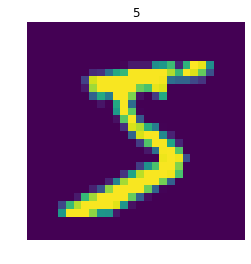

In [0]:
plt.imshow(X_train[0]);
plt.axis('off')
plt.title(y_train[0])
plt.show()

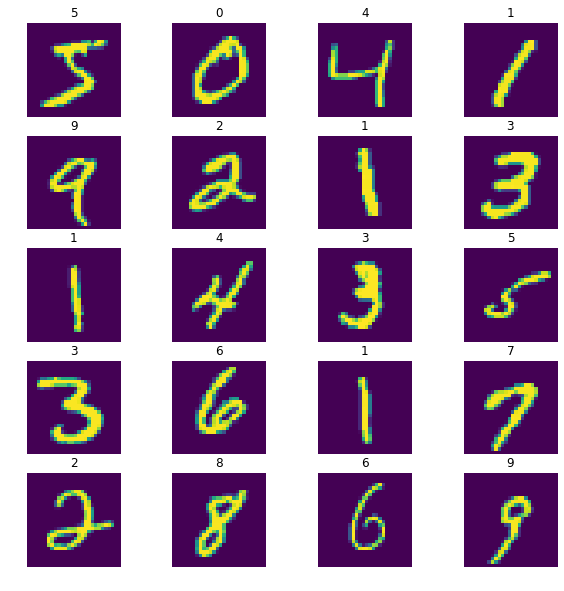

In [0]:
plt.figure(figsize=(10,10))
for i in range(0,20):
  plt.subplot(5,4,i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.axis('off')
plt.show()

In [0]:
batch_size = 128
epochs = 12
num_classes = 10
img_rows,img_cols = 28,28
if K.image_data_format== 'channels_first':
  X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
  X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows,img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
  X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
  input_shape = (img_rows,img_cols,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

print('Number of training samples {}'.format(X_train.shape[0]))
print('number of test samples {}'.format(X_test.shape[0]))
print('training set shape {}'.format(X_train.shape))
print('test set shape {}'.format(X_test.shape))

Number of training samples 60000
number of test samples 10000
training set shape (60000, 28, 28, 1)
test set shape (10000, 28, 28, 1)


In [0]:
for i in range(0,5):
  print(y_train[i])

5
0
4
1
9


In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [0]:
print(y_train.shape)

(60000, 10)


In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer = keras.optimizers.adadelta(),loss = keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [0]:
model.fit(X_train,y_train,batch_size = batch_size,epochs = epochs,verbose=1,validation_data = (X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 260us/step - loss: 0.2626 - acc: 0.9178 - val_loss: 0.0554 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0912 - acc: 0.9727 - val_loss: 0.0410 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0679 - acc: 0.9793 - val_loss: 0.0358 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0557 - acc: 0.9835 - val_loss: 0.0332 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0473 - acc: 0.9858 - val_loss: 0.0366 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0410 - acc: 0.9873 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 7/12
60000/60000 [===

In [0]:
score = model.evaluate(X_test,y_test)
print('model loss {}'.format(score[0]))
print('model accuracy {}'.format(score[1]))

10000/10000 [==============================] - 1s 91us/step
model loss 0.02704434575910309
model accuracy 0.9923


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model.save('digit_classifier.h5')